In [1]:
#lineer regresyon kütüphanesini import ediyoruz.

from sklearn.linear_model import LinearRegression

In [2]:
#diğer kullanılacak kütüphaneler de import edilir. 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [3]:
ad=pd.read_csv('Advertising.csv',usecols=[1,2,3,4])
df=ad.copy()
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
#veri setiyle ilgili bilgilere bakalım 
df.info()

#veri seti içerisinde boş değer olup olmadığını kontrol edelim
df.isnull().values.any()
False 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


False

In [5]:
#Veri seti hakkında tanımlayıcı istatistik bilgilere bakalım.
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


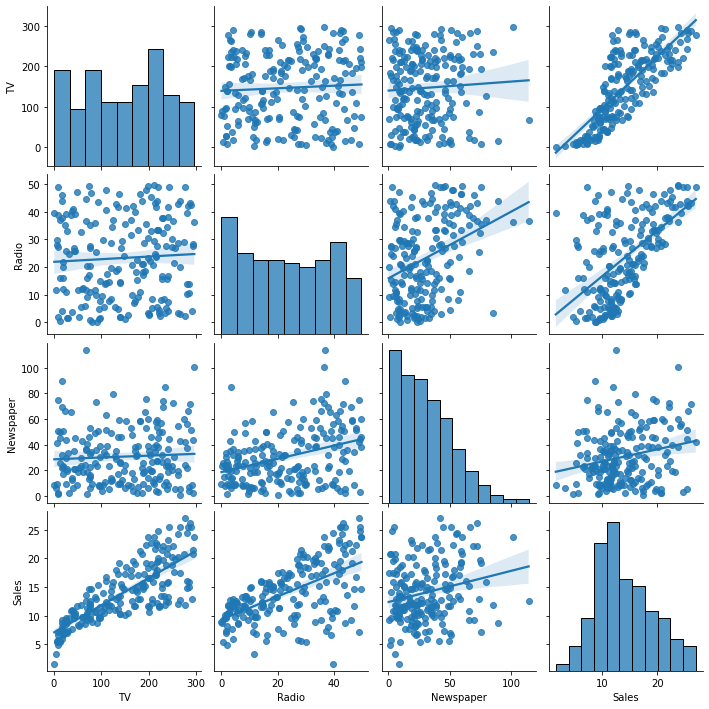

In [6]:
sns.pairplot(df,kind="reg")

Text(0.5, 1.0, 'TV ile Sales arasındaki ilişki')

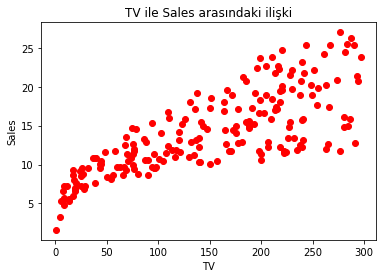

In [7]:
#Ben grafiğe bakarak TV ile Sales arasındaki ilişkiye regresyon ile bakmaya karar veriyorum. 
#Ve modelimi TV verileri ile Sales verilerini tahmin etmeye çalışacak şekilde kuruyorum.

plt.scatter(df["TV"],df["Sales"],color="red")
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title("TV ile Sales arasındaki ilişki")

In [24]:
lineer_regresyon = LinearRegression()
lineer_regresyon.fit(df["TV"].values.reshape(-1,1),df["Sales"].values.reshape(-1,1))

LinearRegression()

In [9]:
print("BO =",lineer_regresyon.intercept_)
print("B1 =",lineer_regresyon.coef_)
print("Elde edilen regresyon modeli: Y={}+{}X".format(lineer_regresyon.intercept_,lineer_regresyon.coef_[0]))

BO = [7.03259355]
B1 = [[0.04753664]]
Elde edilen regresyon modeli: Y=[7.03259355]+[0.04753664]X


In [19]:
y_predicted = lineer_regresyon.predict(df["TV"].values.reshape(-1,1))
r2_score(df["Sales"],y_predicted)

0.611875050850071

In [20]:
#MSE yani ortalama hatalar karesine de bakalım.
print("Ortalama Mutlak Hata: {} \nOrtalama Hatalar Karesi: {}".format(
    mean_absolute_error(df["Sales"], y_predicted), mean_squared_error(df["Sales"], y_predicted)))

Ortalama Mutlak Hata: 2.549806038927486 
Ortalama Hatalar Karesi: 10.512652915656757


C:\Users\sotka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Satış Sayısı')

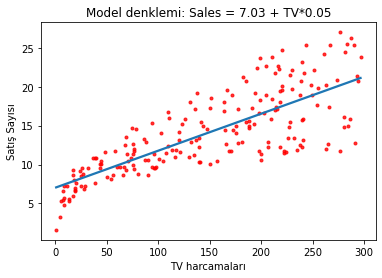

In [21]:
g = sns.regplot(df["TV"],df["Sales"],ci=None, scatter_kws={'color':'r', 's':9})
g.set_title("Model denklemi: Sales = 7.03 + TV*0.05")
g.set_xlabel("TV harcamaları")
g.set_ylabel("Satış Sayısı")